<a href="https://colab.research.google.com/github/zxs1652/zcq/blob/master/class6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jan 27 02:10:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub

from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

     |████████████████████████████████| 348.9MB 23kB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 3.1MB 49.6MB/s 
     |████████████████████████████████| 501kB 59.8MB/s 


In [ ]:

%cd /content/gdrive/MyDrive/colab/class/graph
data_root='/content/gdrive/MyDrive/colab/class/graph'

/content/gdrive/MyDrive/colab/class/graph


In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
datagen_kwargs_train = dict(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs_train)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)


/content/gdrive/MyDrive/colab/class/graph
Found 276 images belonging to 69 classes.
Found 1656 images belonging to 69 classes.


In [ ]:

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 69)
['#1' '#12' '#123' '#1234' '#1235' '#1238' '#124' '#125' '#1256' '#126'
 '#127' '#128' '#13' '#134' '#1345' '#1348' '#135' '#1357' '#137' '#138'
 '#14' '#145' '#1458' '#148' '#15' '#16' '#17' '#18' '#2' '#23' '#234'
 '#2345' '#2348' '#236' '#2367' '#237' '#238' '#24' '#246' '#2468' '#248'
 '#25' '#26' '#27' '#28' '#3' '#34' '#347' '#3478' '#348' '#35' '#36'
 '#37' '#38' '#4' '#45' '#46' '#47' '#48' '#5' '#56' '#57' '#58' '#6'
 '#67' '#68' '#7' '#78' '#8']


In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 69)                88389     
Total params: 2,346,373
Trainable params: 88,389
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit_generator(
    train_generator, 
    epochs=5,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - ETA: 0s - loss: 4.7281 - acc: 0.0197WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f1685656bf8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - 423s 8s/step - loss: 4.7252 - acc: 0.0198 - val_loss: 3.7136 - val_acc: 0.1341
Epoch 2/5
52/52 [==============================] - 64s 1s/step - loss: 4.0261 - acc: 0.0681 - val_loss: 3.2690 - val_acc: 0.1957
Epoch 3/5
52/52 [==============================] - 63s 1s/step - loss: 3.5765 - acc: 0.1238 - val_loss: 2.8995 - val_acc: 0.3442
Epoch 4/5
52/52 [==============================] - 63s 1s/step - loss: 3.3768 - acc: 0.1674 - val_loss: 2.7012 - val_acc: 0.3551
Epoch 5/5
52/52 [==============================] - 63s 1s/step - loss: 3.1176 - acc: 0.2205 - val_loss: 2.5073 - val_acc: 0.4203


In [ ]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

Text(0.5, 1.0, 'trainset accuracy')

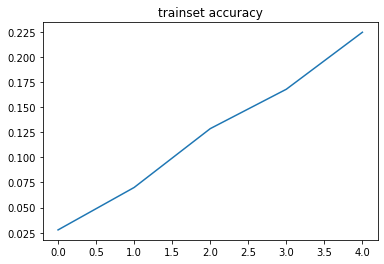

In [ ]:
plt.plot(accuracy)
plt.title('trainset accuracy')

In [ ]:

from sklearn.metrics import confusion_matrix    # 生成混淆矩阵函数

In [ ]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    fig=plt.figure(figsize=(25,20))
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    #plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

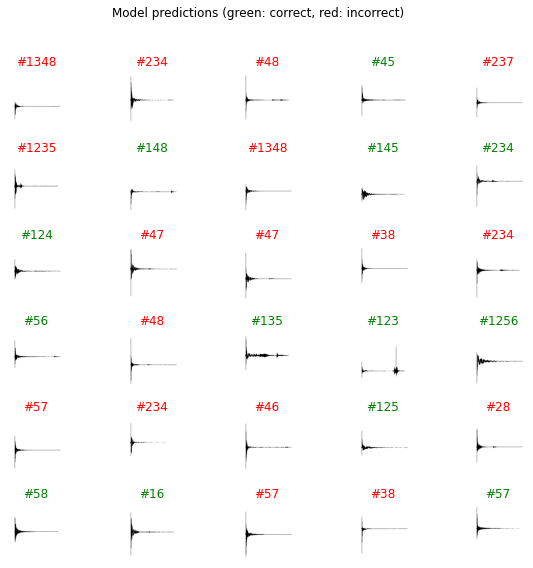

In [ ]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])

predicted_batch = model.predict(image_batch_train)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch_train, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch_train[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
predicted_id 

array([15, 30, 58, 55, 35,  4, 23, 15, 21, 30,  6, 57, 57, 53, 30, 60, 58,
       16,  2,  8, 61, 30, 56,  7, 44, 62, 25, 61, 53, 61, 53,  4])

In [ ]:
label_id

array([27, 48, 57, 55,  6, 56, 23, 41, 21, 30,  6, 65, 42,  0, 62, 60, 66,
       16,  2,  8, 50, 45, 46,  7, 25, 62, 25, 60, 34, 61, 65,  1])

In [ ]:
predicted_batch = model.predict(train_generator)
predicted_id = np.argmax(predicted_batch, axis=-1)

In [ ]:
predicted_id.shape

(1656,)

In [ ]:
predicted_id[:40]

array([35, 20, 53, 30, 30, 37, 30, 44, 41, 61, 52, 56, 57, 61,  5, 24, 58,
       21,  8, 24, 55, 30, 30,  2, 30, 28, 61, 46, 44, 57, 30,  1, 44, 28,
       30, 30, 15, 56,  2, 53])

In [ ]:
import math
number_of_examples = len(train_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

train_labels = []

for i in range(0,int(number_of_generator_calls)):
    #train_labels.extend(np.array(train_generator[i][1]))
    _,l=next(iter(train_generator))
    label = np.argmax(l, axis=-1)
    list_l=label.tolist()
    train_labels.extend(label)

In [ ]:
train_label=np.array(train_labels)

In [ ]:
train_label.shape

(1656,)

In [ ]:
train_label[:40]

array([12, 42,  3, 52, 55, 66, 51,  5,  3,  4, 63, 37, 45, 58, 36,  3, 66,
       12, 52,  2, 66,  8, 55, 64, 48, 64, 34, 20, 48, 13, 62, 44, 33, 23,
       36, 38, 56, 15, 13, 48])

In [ ]:
cm = confusion_matrix(train_label, predicted_id,)

In [ ]:
cm.shape

(69, 69)

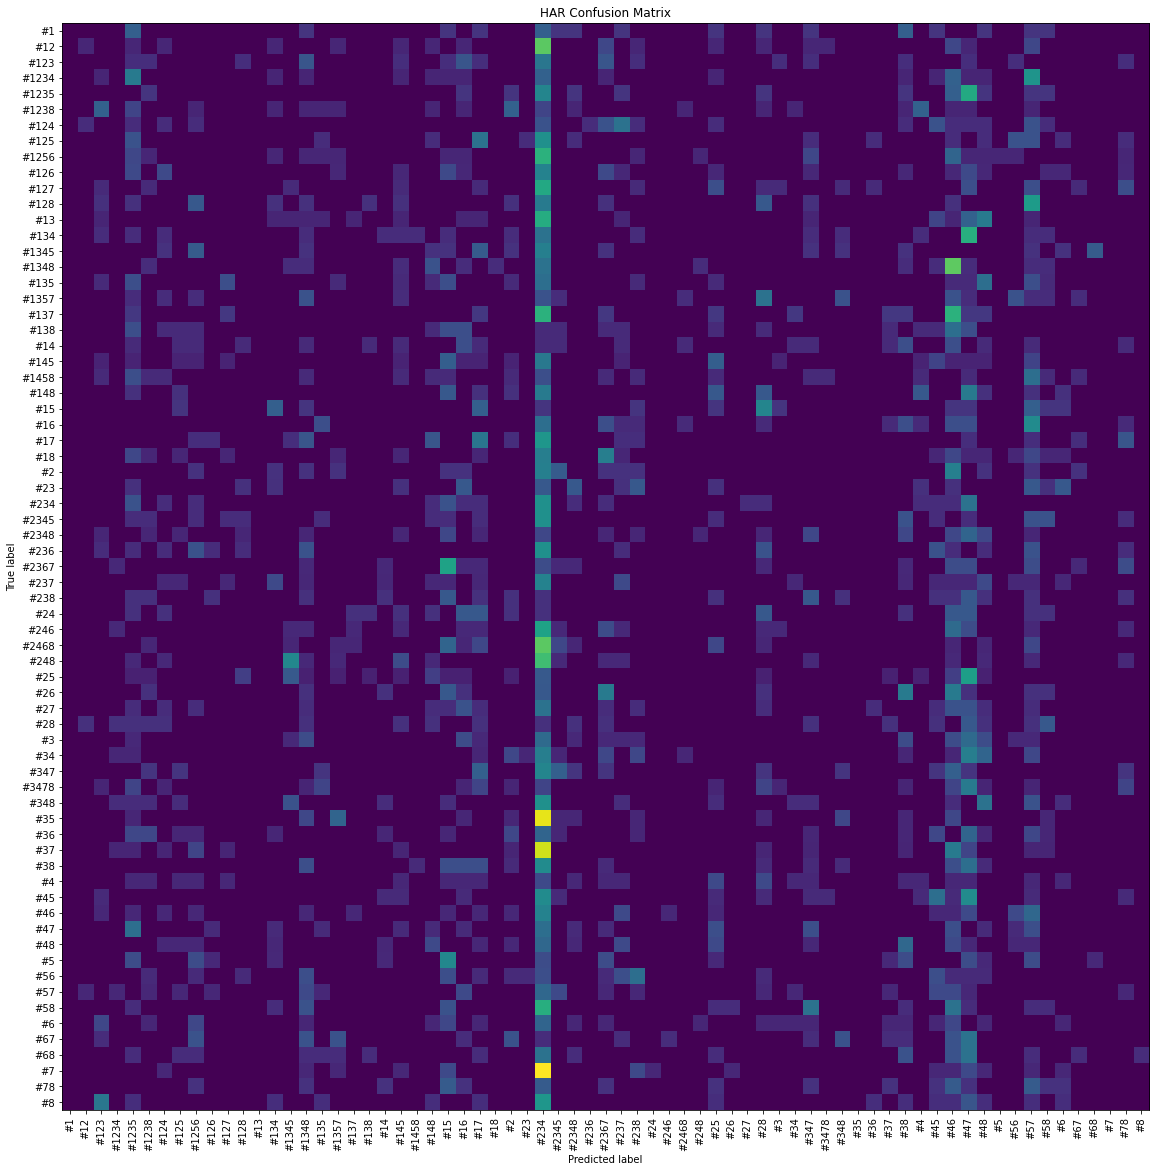

In [ ]:
plot_confusion_matrix(cm, class_names, "HAR Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

In [ ]:

y_true = train_label# ground truth labels
y_probas =predicted_id # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [ ]:
def plot_roc_curve(y_true, y_probas, title='ROC Curves',
                   curves=('micro', 'macro', 'each_class'),
                   ax=None, figsize=(25,20), cmap='nipy_spectral',
                   title_fontsize="large", text_fontsize="medium"):
    
    y_true = np.array(y_true)
    y_probas = np.array(y_probas)

    if 'micro' not in curves and 'macro' not in curves and \
            'each_class' not in curves:
        raise ValueError('Invalid argument for curves as it '
                         'only takes "micro", "macro", or "each_class"')

    classes = np.unique(y_true)
    probas = y_probas

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true, probas[:, i], pos_label=classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    micro_key = 'micro'
    i = 0
    while micro_key in fpr:
        i += 1
        micro_key += str(i)

    y_true = label_binarize(y_true, classes=classes)
    if len(classes) == 2:
        y_true = np.hstack((1 - y_true, y_true))

    fpr[micro_key], tpr[micro_key], _ = roc_curve(y_true.ravel(),
                                                  probas.ravel())
    roc_auc[micro_key] = auc(fpr[micro_key], tpr[micro_key])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[x] for x in range(len(classes))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(classes)

    macro_key = 'macro'
    i = 0
    while macro_key in fpr:
        i += 1
        macro_key += str(i)
    fpr[macro_key] = all_fpr
    tpr[macro_key] = mean_tpr
    roc_auc[macro_key] = auc(fpr[macro_key], tpr[macro_key])

    if ax is None:
        #fig, ax = plt.subplots(1, 1, figsize=figsize)
        fig, ax = plt.plot(1, 1, figsize=figsize)
        
    ax.set_title(title, fontsize=title_fontsize)

    if 'each_class' in curves:
        for i in range(len(classes)):
            color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
            ax.plot(fpr[i], tpr[i], lw=2, color=color,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(classes[i], roc_auc[i]),figsize=figsize)

    if 'micro' in curves:
        ax.plot(fpr[micro_key], tpr[micro_key],
                label='micro-average ROC curve '
                      '(area = {0:0.2f})'.format(roc_auc[micro_key]),
                color='deeppink', linestyle=':', linewidth=4,figsize=figsize)

    if 'macro' in curves:
        ax.plot(fpr[macro_key], tpr[macro_key],
                label='macro-average ROC curve '
                      '(area = {0:0.2f})'.format(roc_auc[macro_key]),
                color='navy', linestyle=':', linewidth=4,figsize=figsize)
    plt.figure(figsize=(10, 10.5))
    #ax.plot([0, 10], [0, 10], 'k--', lw=2,figsize=figsize)
    #ax.set_xlim([0.0, 10])
    #ax.set_ylim([0.0, 10.5])
    ax.set_xlabel('False Positive Rate', fontsize=text_fontsize)
    ax.set_ylabel('True Positive Rate', fontsize=text_fontsize)
    ax.tick_params(labelsize=text_fontsize)
    ax.legend(loc='lower right', fontsize=text_fontsize)
    return ax




In [ ]:
a=predicted_id.ravel()

In [ ]:
a.shape

(1656,)

In [ ]:
predicted_id.shape

(1656,)

In [ ]:
train_label.shape

(1656,)

In [ ]:
predict_probas=model.predict_proba(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


In [ ]:
predict_probas.shape

(1656, 69)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


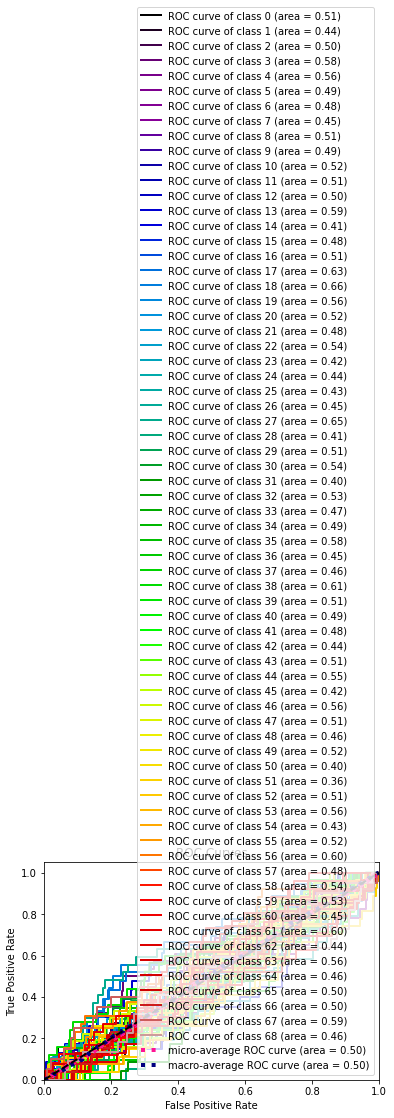

In [ ]:
y_true = train_label# ground truth labels
y_probas =predict_probas # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [ ]:
hist = model.fit_generator(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:


52/52 [==============================] - 64s 1s/step - loss: 2.9567 - acc: 0.2421 - val_loss: 2.3085 - val_acc: 0.4565


In [ ]:
model.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

52/52 [==============================] - 64s 1s/step - loss: 2.7835 - acc: 0.2899 - val_loss: 2.1731 - val_acc: 0.5036


In [ ]:
hist = model.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

52/52 [==============================] - 64s 1s/step - loss: 2.6762 - acc: 0.3050 - val_loss: 2.0557 - val_acc: 0.5471


In [ ]:
final_model_path = "saved_models/final0"
#tf.keras.experimental.export_saved_model(model, final_model)
tf.keras.models.save_model(model,final_model_path,save_format="tf")

INFO:tensorflow:Assets written to: saved_models/final0/assets


INFO:tensorflow:Assets written to: saved_models/final0/assets


In [ ]:

# Load SavedModel
#final_model = tf.keras.experimental.load_from_saved_model(final_model_path,custom_objects={'KerasLayer':hub.KerasLayer})
final_model = tf.keras.models.load_model(final_model_path)

In [ ]:
final_model.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - ETA: 0s - loss: 5.1648 - acc: 0.0248WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f15ca086d08> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - 74s 1s/step - loss: 5.1648 - acc: 0.0248 - val_loss: 4.3336 - val_acc: 0.0145


In [176]:

hist = model.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)


52/52 [==============================] - 66s 1s/step - loss: 2.5968 - acc: 0.3164 - val_loss: 1.9531 - val_acc: 0.5362


In [185]:
import yaml
import json
%cd /content/gdrive/MyDrive/colab/saved_models
# 保存模型结构到yaml文件或者json文件
yaml_string = model.to_yaml()
open('model_architecture.yaml', 'w').write(yaml_string)
# json_string = model.to_json()
# open('../docs/keras/model_architecture.json', 'w').write(json_string)

# 保存模型参数到h5文件
model.save_weights('model_weights.h5')

/content/gdrive/MyDrive/colab/saved_models


In [188]:
import yaml
import json
from keras.models import model_from_json
from keras.models import model_from_yaml

# 加载模型结构
model00 = model_from_yaml(open('model_architecture.yaml').read(),custom_objects={'KerasLayer': hub.KerasLayer})
# model = model_from_json(open('../docs/keras/model_architecture.json').read())

# 加载模型参数
model00.load_weights('model_weights.h5')

In [190]:
model00.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])
hist00 = model00.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - ETA: 0s - loss: 2.5459 - acc: 0.3376WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f15432180d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - 70s 1s/step - loss: 2.5462 - acc: 0.3376 - val_loss: 1.8516 - val_acc: 0.6123


In [191]:
hist00 = model00.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

52/52 [==============================] - 67s 1s/step - loss: 2.3604 - acc: 0.3822 - val_loss: 1.7674 - val_acc: 0.6087


In [192]:
hist = model.fit(
    train_generator, 
    epochs=60,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Epoch 1/60
52/52 [==============================] - 66s 1s/step - loss: 2.4589 - acc: 0.3551 - val_loss: 1.8716 - val_acc: 0.5870
Epoch 2/60
52/52 [==============================] - 63s 1s/step - loss: 2.3645 - acc: 0.3847 - val_loss: 1.7905 - val_acc: 0.5906
Epoch 3/60
52/52 [==============================] - 64s 1s/step - loss: 2.2921 - acc: 0.3961 - val_loss: 1.7388 - val_acc: 0.6304
Epoch 4/60
52/52 [==============================] - 63s 1s/step - loss: 2.2323 - acc: 0.4167 - val_loss: 1.6377 - val_acc: 0.6522
Epoch 5/60
52/52 [==============================] - 62s 1s/step - loss: 2.1480 - acc: 0.4372 - val_loss: 1.5765 - val_acc: 0.6630
Epoch 6/60
52/52 [==============================] - 61s 1s/step - loss: 2.0486 - acc: 0.4626 - val_loss: 1.5408 - val_acc: 0.6630
Epoch 7/60
52/52 [==============================] - 61s 1s/step - loss: 2.0298 - acc: 0.4783 - val_loss: 1.5219 - val_acc: 0.6449
Epoch 8/60
52/52 [==============================] - 62s 1s/step - loss: 2.0044 - acc: 0.46

In [194]:
accuracy1 = hist.history['acc']
val_accuracy1 = hist.history['val_acc']
loss1 = hist.history['loss']
val_loss1 = hist.history['val_loss']

In [195]:
hist2 = model.fit(
    train_generator, 
    epochs=40,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Epoch 1/40
52/52 [==============================] - 62s 1s/step - loss: 0.9124 - acc: 0.7572 - val_loss: 0.4409 - val_acc: 0.9638
Epoch 2/40
52/52 [==============================] - 61s 1s/step - loss: 0.9046 - acc: 0.7530 - val_loss: 0.4450 - val_acc: 0.9601
Epoch 3/40
52/52 [==============================] - 61s 1s/step - loss: 0.8833 - acc: 0.7711 - val_loss: 0.4224 - val_acc: 0.9674
Epoch 4/40
52/52 [==============================] - 61s 1s/step - loss: 0.8632 - acc: 0.7778 - val_loss: 0.4148 - val_acc: 0.9746
Epoch 5/40
52/52 [==============================] - 61s 1s/step - loss: 0.8777 - acc: 0.7705 - val_loss: 0.4189 - val_acc: 0.9710
Epoch 6/40
52/52 [==============================] - 61s 1s/step - loss: 0.8670 - acc: 0.7669 - val_loss: 0.4030 - val_acc: 0.9674
Epoch 7/40
52/52 [==============================] - 61s 1s/step - loss: 0.8550 - acc: 0.7778 - val_loss: 0.3914 - val_acc: 0.9746
Epoch 8/40
52/52 [==============================] - 61s 1s/step - loss: 0.8429 - acc: 0.77

In [196]:
accuracy2 = hist2.history['acc']
val_accuracy2 = hist2.history['val_acc']
loss2 = hist2.history['loss']
val_loss2 = hist2.history['val_loss']

In [200]:
hist3 = model.fit(
    train_generator, 
    epochs=100,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Epoch 1/100
52/52 [==============================] - 62s 1s/step - loss: 0.6738 - acc: 0.8297 - val_loss: 0.2522 - val_acc: 0.9819
Epoch 2/100
52/52 [==============================] - 61s 1s/step - loss: 0.6542 - acc: 0.8098 - val_loss: 0.2552 - val_acc: 0.9710
Epoch 3/100
52/52 [==============================] - 61s 1s/step - loss: 0.6773 - acc: 0.8225 - val_loss: 0.2389 - val_acc: 0.9928
Epoch 4/100
52/52 [==============================] - 61s 1s/step - loss: 0.6698 - acc: 0.8188 - val_loss: 0.2420 - val_acc: 0.9964
Epoch 5/100
52/52 [==============================] - 61s 1s/step - loss: 0.6595 - acc: 0.8176 - val_loss: 0.2342 - val_acc: 0.9964
Epoch 6/100
52/52 [==============================] - 61s 1s/step - loss: 0.7017 - acc: 0.8086 - val_loss: 0.2440 - val_acc: 0.9855
Epoch 7/100
52/52 [==============================] - 61s 1s/step - loss: 0.6306 - acc: 0.8309 - val_loss: 0.2290 - val_acc: 0.9928
Epoch 8/100
52/52 [==============================] - 61s 1s/step - loss: 0.6267 - a

In [201]:
accuracy3 = hist3.history['acc']
val_accuracy3 = hist3.history['val_acc']
loss3 = hist3.history['loss']
val_loss3 = hist3.history['val_loss']

In [202]:
hist4 = model.fit(
    train_generator, 
    epochs=20,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Epoch 1/20
52/52 [==============================] - 62s 1s/step - loss: 0.4196 - acc: 0.8961 - val_loss: 0.0968 - val_acc: 1.0000
Epoch 2/20
52/52 [==============================] - 61s 1s/step - loss: 0.4191 - acc: 0.8901 - val_loss: 0.0878 - val_acc: 1.0000
Epoch 3/20
52/52 [==============================] - 61s 1s/step - loss: 0.4373 - acc: 0.8847 - val_loss: 0.0911 - val_acc: 1.0000
Epoch 4/20
52/52 [==============================] - 61s 1s/step - loss: 0.4499 - acc: 0.8714 - val_loss: 0.0936 - val_acc: 1.0000
Epoch 5/20
52/52 [==============================] - 61s 1s/step - loss: 0.4116 - acc: 0.8913 - val_loss: 0.0977 - val_acc: 0.9964
Epoch 6/20
52/52 [==============================] - 61s 1s/step - loss: 0.4182 - acc: 0.8774 - val_loss: 0.1015 - val_acc: 1.0000
Epoch 7/20
52/52 [==============================] - 61s 1s/step - loss: 0.4460 - acc: 0.8684 - val_loss: 0.1000 - val_acc: 1.0000
Epoch 8/20
52/52 [==============================] - 61s 1s/step - loss: 0.4264 - acc: 0.87

In [203]:
accuracy4 = hist4.history['acc']
val_accuracy4 = hist4.history['val_acc']
loss4 = hist4.history['loss']
val_loss4 = hist4.history['val_loss']

In [205]:
hist5 = model.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

52/52 [==============================] - 62s 1s/step - loss: 0.3719 - acc: 0.8986 - val_loss: 0.0835 - val_acc: 1.0000


In [206]:
accuracy5 = hist5.history['acc']
val_accuracy5 = hist5.history['val_acc']
loss5 = hist5.history['loss']
val_loss5 = hist5.history['val_loss']

In [214]:
accuracy_final=[]
accuracy_final.append(accuracy)
accuracy_final.append(accuracy1)

In [216]:
a=[1,2]
b=[2,3]
c=a+b

In [217]:
c

[1, 2, 2, 3]

In [221]:
accuracy_final=accuracy1+accuracy2+accuracy3+accuracy4+accuracy5

In [222]:
loss_final=loss1+loss2+loss3+loss4+loss5

In [223]:
val_accuracy_final=val_accuracy1+val_accuracy2+val_accuracy3+val_accuracy4+val_accuracy5

In [224]:
val_loss_final=val_loss1+val_loss2+val_loss3+val_loss4+val_loss5

Text(0.5, 1.0, 'trainset accuracy')

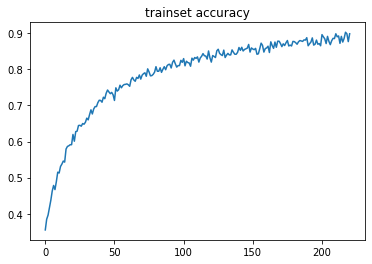

In [225]:
plt.plot(accuracy_final)
plt.title('trainset accuracy')

Text(0.5, 1.0, 'trainset loss')

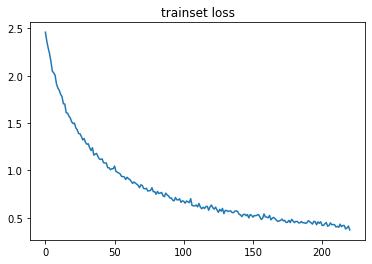

In [226]:
plt.plot(loss_final)
plt.title('trainset loss')

Text(0.5, 1.0, 'testset accuracy')

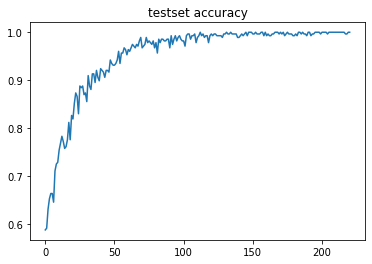

In [227]:
plt.plot(val_accuracy_final)
plt.title('testset accuracy')

Text(0.5, 1.0, 'testset loss')

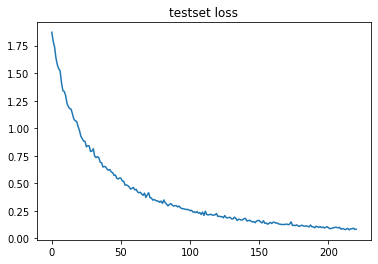

In [228]:
plt.plot(val_loss_final)
plt.title('testset loss')

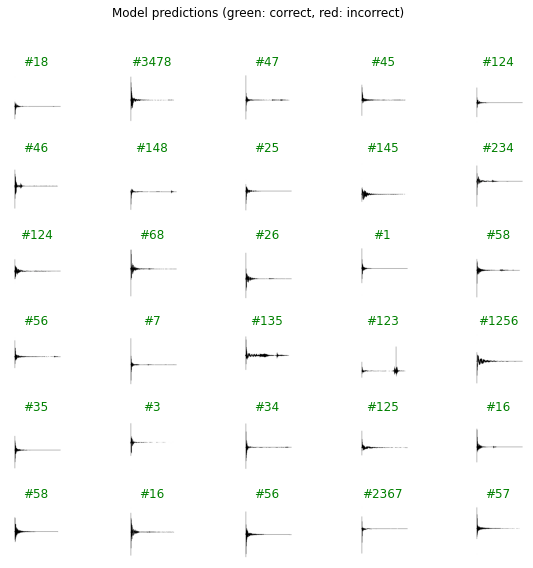

In [229]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])

predicted_batch = model.predict(image_batch_train)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch_train, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch_train[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [230]:
predicted_batch = model.predict(train_generator)
predicted_id = np.argmax(predicted_batch, axis=-1)

In [231]:
import math
number_of_examples = len(train_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

train_labels = []

for i in range(0,int(number_of_generator_calls)):
    #train_labels.extend(np.array(train_generator[i][1]))
    _,l=next(iter(train_generator))
    label = np.argmax(l, axis=-1)
    list_l=label.tolist()
    train_labels.extend(label)
    
train_label=np.array(train_labels)

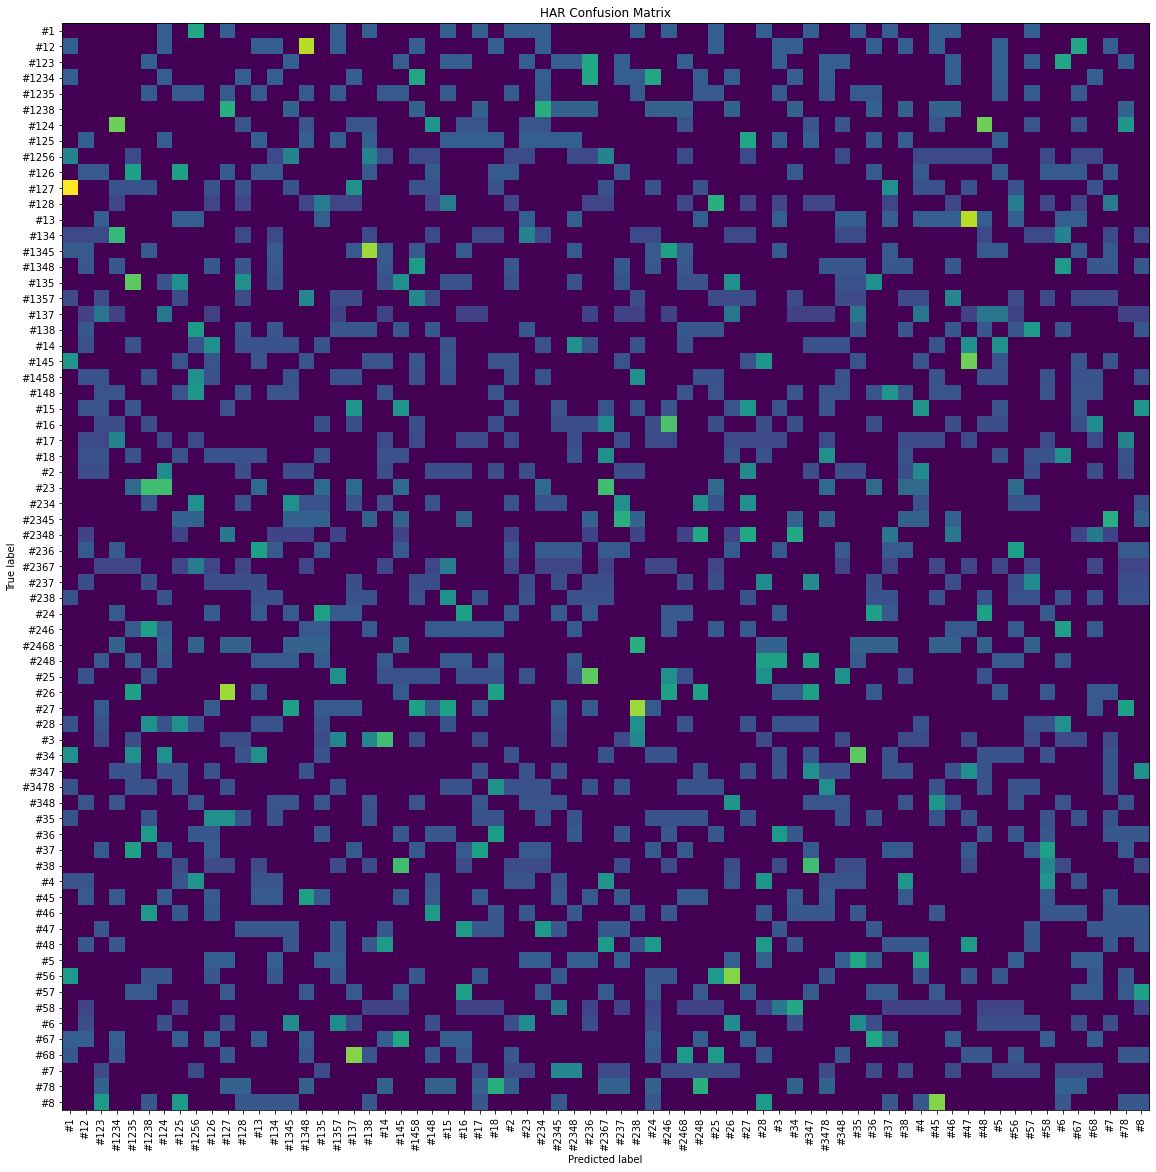

In [232]:
cm = confusion_matrix(train_label, predicted_id,)
plot_confusion_matrix(cm, class_names, "HAR Confusion Matrix")
plt.show()

In [233]:
predict_probas=model.predict_proba(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


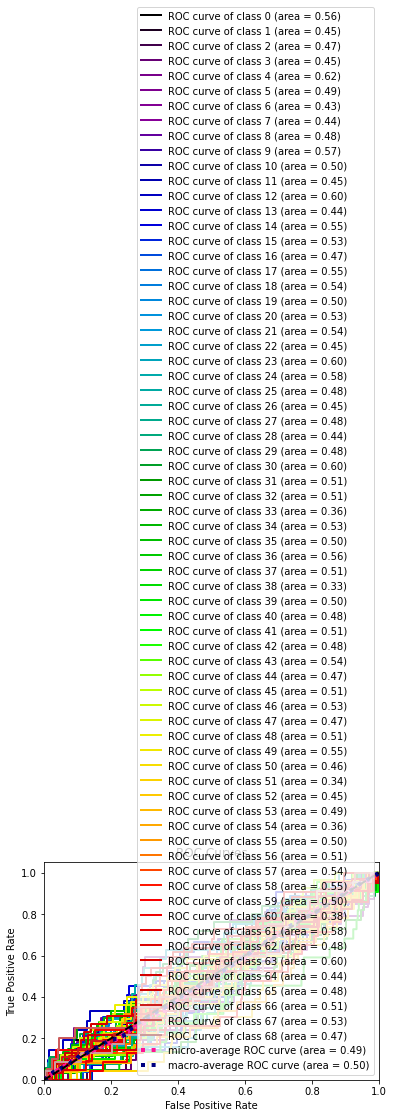

In [234]:
y_true = train_label# ground truth labels
y_probas =predict_probas # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [235]:
import yaml
import json
%cd /content/gdrive/MyDrive/colab/saved_models
# 保存模型结构到yaml文件或者json文件
yaml_string = model.to_yaml()
open('model_architecture_final.yaml', 'w').write(yaml_string)
# json_string = model.to_json()
# open('../docs/keras/model_architecture.json', 'w').write(json_string)

# 保存模型参数到h5文件
model.save_weights('model_weights_final.h5')

/content/gdrive/MyDrive/colab/saved_models


In [236]:
import yaml
import json
from keras.models import model_from_json
from keras.models import model_from_yaml

# 加载模型结构
model_demo = model_from_yaml(open('model_architecture_final.yaml').read(),custom_objects={'KerasLayer': hub.KerasLayer})
# model = model_from_json(open('../docs/keras/model_architecture.json').read())

# 加载模型参数
model_demo.load_weights('model_weights_final.h5')

In [238]:
model_demo.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])
model_demo.fit(
    train_generator, 
    epochs=1,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - ETA: 0s - loss: 0.4176 - acc: 0.8793WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f15429877b8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - 67s 1s/step - loss: 0.4177 - acc: 0.8792 - val_loss: 0.0802 - val_acc: 1.0000
